## Imports

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Read in data

In [5]:
df = pd.read_csv("final_perfume_data.csv", encoding='unicode_escape')

In [7]:
df.head()

,Name,Brand,Description,Notes,Image URL
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...","Vanilla bean, musks",https://static.luckyscent.com/images/products/...
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,"Lavender, Yuzu, Lemongrass, Magnolia, Geraniu...",https://static.luckyscent.com/images/products/...
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,"Green yuzu, green shikuwasa, sansho seed, cor...",https://static.luckyscent.com/images/products/...
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,"tangerine, pink pepper, black coffee, leat...",https://static.luckyscent.com/images/products/...
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,"Bergamot, almond, violet, jasmine, leather, s...",https://static.luckyscent.com/images/products/...


In [8]:
df.dtypes

Name           object
Brand          object
Description    object
Notes          object
Image URL      object
dtype: object

In [9]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes', 'Image URL'], dtype='object')

In [10]:
df.shape

(2191, 5)

In [11]:
df = df.drop(columns="Image URL")

In [12]:
df.columns

Index(['Name', 'Brand', 'Description', 'Notes'], dtype='object')

## Pre-processing

In [14]:
df.isna().sum()

Name            0
Brand           0
Description     0
Notes          80
dtype: int64

In [16]:
## keeping the og df just in case!
df_drop = df.dropna

In [ ]:
## trying out how to seperate the notes!! :D
## i referenced code from the anime demo, please feel free to change this to something better! - sky
## changing it to a commma with a space after adds more scents, but it adds one like "your guess is as good as ours." lol
## some scents are definitely missing with this!!!
df_enc = df.join(pd.concat([df['Notes'].str.get_dummies(sep=',')])).drop('Notes',axis=1)

In [31]:
df_enc.shape

(2191, 4321)

In [34]:
df_enc.head()

,Name,Brand,Description,,Amber and Canadian Fir Balsam,Caramel,Clary Sage,Ethiopian Myrrh,Geranium Flower,Guaiac Wood,...,jasmine,lemony,lily,ocean,oolong,red berries,sage,spiced plums,tobacco,vanilla
0,Tihota Eau de Parfum,Indult,"Rapa Nui for sugar, Tihota is, quite simply, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sola Parfum,Di Ser,A tribute to the expanse of space extending f...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Kagiroi Parfum,Di Ser,An aromatic ode to the ancient beauty of Japa...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Velvet Fantasy Eau de Parfum,Montale,Velvet Fantasy is a solar fragrance where cit...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,A Blvd. Called Sunset Eau de Parfum,A Lab on Fire,There's no way A Lab On Fire could relocate t...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Visualizations

In [28]:
note_melt = pd.melt(df_enc, id_vars=None,
     value_vars=['   Amber and Canadian Fir Balsam',
       '   Caramel', '   Clary Sage', '   Ethiopian Myrrh',
       '   Geranium Flower', '   Guaiac Wood',
       'jasmine', 'lemony', 'lily', 'ocean', 'oolong', 'red berries', 'sage',
       'spiced plums', 'tobacco', 'vanilla'],
     var_name='Notes', value_name='Scent')

Text(0.5, 1.0, 'Ratio of Notes')

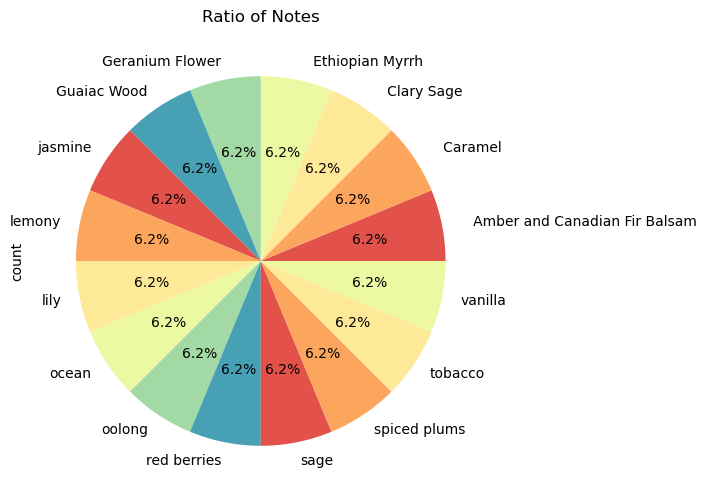

In [48]:
## pie chart of notes to start
plt.figure(figsize=(10,6))
note_melt['Notes'].value_counts().plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Spectral"))
plt.title('Ratio of Notes')